# 1. Computing the autocorrelation of a dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
url='https://www.cdslab.org/recipes/programming/stat-covmat/globalLandTempHist.txt'

In [3]:
#downloads file from given url
def download(url, fpath):
    import requests
    r = requests.get(url)
    with open(fpath, 'wb') as f:
        f.write(r.content)
    return None

#fetching data file
def fetchDatafromWeb(filePath,url):
    download(url,filePath)
    return filePath

In [4]:
fetchDatafromWeb(filePath="./globalLandTempHist.txt", url=url)

'./globalLandTempHist.txt'

In [6]:
""" Droping rows with values NaN """
ndf=df.dropna()
ndf

,year,anomaly
0,1743.846154,-1.131
5,1744.307692,1.926
6,1744.384615,-1.115
7,1744.461538,-0.235
8,1744.538462,-0.430
...,...,...
3234,2013.384615,0.813
3235,2013.461538,1.088
3236,2013.538462,0.671
3237,2013.615385,0.919


In [7]:
""" Replacing real number values in the "year" column to whole year values """
import math
for year in ndf["year"].values:
    whole_yr=math.trunc(year)
    ndf["year"].replace({year:whole_yr}, inplace=True)
ndf

/usr/local/lib/python3.8/dist-packages/pandas/core/series.py:4479: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,year,anomaly
0,1743.0,-1.131
5,1744.0,1.926
6,1744.0,-1.115
7,1744.0,-0.235
8,1744.0,-0.430
...,...,...
3234,2013.0,0.813
3235,2013.0,1.088
3236,2013.0,0.671
3237,2013.0,0.919


In [27]:
%%timeit
""" Finding annual avg temp anomaly data for each year subset from previous df """
meandf =ndf.groupby('year')['anomaly'].mean().to_frame().reset_index()
#meandf =ndf.groupby('year')['anomaly'].mean().to_frame()

1.3 ms ± 20.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [28]:
meandf

,year,anomaly
0,1743.0,-1.131000
1,1744.0,-0.572000
2,1745.0,-1.057500
3,1750.0,-0.201000
4,1751.0,-0.263250
...,...,...
262,2009.0,0.824083
263,2010.0,1.018500
264,2011.0,0.835667
265,2012.0,0.818167


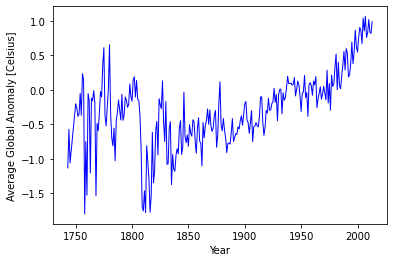

In [19]:
""" Average Global Anomaly [Celsius] vs. Year Plot """
x=meandf["year"] 
y=meandf["anomaly"]

ax = plt.gca()
ax.set_xlabel("Year")
ax.set_ylabel("Average Global Anomaly [Celsius]")
#ax.axis ([1750, 2000, -2, 1.5]) #xmin, xmax, ymin, ymax
ax.plot(x,y,
        color='b',
        linewidth=1.0
       )
plt.show()

Use the definition of the correlation matrix that we have seen before to compute the autocorrelation of temperature anomaly of Earth starting from the first non-NAN value to the end, for all different possible lags. Make a plot of the autocorrelation vs. lag.

In [10]:
""" Numpy Array of Mean Dataframe """
mdata=meandf.to_numpy()

In [11]:
import math
def getPearsonCor(data1,data2):
    """""
        Generate and return the pearson correlation coefficient. 
        Input two columns of data to your function to compute the Pearson corrcoeff. 
        The columns correspond to the data attributes.
        Make sure rows of data with "nan" are removed.
        
        Parameters:
            data1,data2 = data attribute 1, data attribute 2
    """""
    x_mean, y_mean = data1.mean(), data2.mean()
    #x_std, y_std = data1.std(), data2.std()
    x_var = sum ((x_i - x_mean)**2 for x_i in data1)
    y_var = sum ((y_i - y_mean)**2 for y_i in data2)
    
    #cov(x,y)- numerator
    #sqrt(varx*vary)-denominator
    cov = sum((x_i-x_mean)*(y_i-y_mean) for x_i,y_i in zip(data1,data2))
    den = math.sqrt(x_var*y_var)
    
        
    return np.true_divide(cov,den)

Comparing/Checking getPearsonCor with autocorr function given lag=1:

In [12]:
getPearsonCor(mdata[:,1][:-1], mdata[:,1][1:])

0.7542902127574144

In [13]:
meandf['anomaly'].autocorr(lag=1)

0.7542902127574143

In [21]:
%%timeit
def getAutoCor(data,t=None):
    """""
        Generate and return autoccorelation of input 1-D array data (anomalies) with given number of lags "t".
        
        Recall that the autocorrelation of a time-series is defined as 
        the correlation of a univariate dataset with itself, with some positive lag τ.
    """""
    #i ~ lag
    acf=[]
    if t is None:
        for i in range(len(data)):
            acorr = getPearsonCor(mdata[:,1][:-i], mdata[:,1][i:])
            #acorr=data.autocorr(lag=i) #if data=meandf["anomaly"]
            acf.append(acorr)
    else:
        for i in range(t):
            acorr = getPearsonCor(mdata[:,1][:-i], mdata[:,1][i:])
            #acorr=data.autocorr(lag=i) #if data=meandf["anomaly"]
            acf.append(acorr)
 

    return acf

68.9 ns ± 6.93 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [20]:
%%timeit
#gen_acf=getAutoCor(meandf["anomaly"])
gen_acf=getAutoCor(mdata[:,1])

<ipython-input-11-9fdef82c0cb6>:12: RuntimeWarning: Mean of empty slice.
  x_mean, y_mean = data1.mean(), data2.mean()
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
<ipython-input-11-9fdef82c0cb6>:23: RuntimeWarning: invalid value encountered in true_divide
  return np.true_divide(cov,den)


108 ms ± 13.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Text(0, 0.5, 'Global Temp Anomaly Autocorrelation')

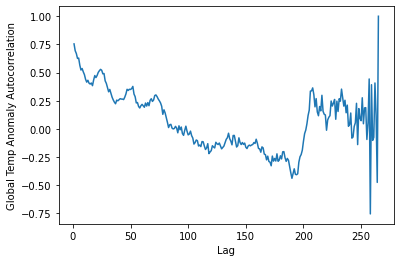

In [16]:
xgen_acf=[i for i in range(len(gen_acf))]
plt.plot(xgen_acf,gen_acf)
plt.xlabel("Lag")
plt.ylabel("Global Temp Anomaly Autocorrelation")
#array length 2^alpha => 2n

Now, use an external library in the language of your choice to compute the autocorrelation using Fast-Fourier Transform (FFT). Within Python, you can use correlate in SciPy package from scipy.signal import correlate to compute the autocorrelation. To do so, you will have to first normalize the input data (the anomaly data) to its mean. Then you pass the data in syntax like the following,

In [29]:
anomalies=meandf["anomaly"]

In [25]:

""" Code Provided from Assignment """
import numpy as np
from scipy.signal import correlate

anomalies = anomalies - np.mean(anomalies) #normalizing anomalies

nlag = len(anomalies) - 1
acf = np.zeros(nlag)

acf = correlate ( anomalies
                , anomalies
                , mode = "full"
                )[nlag:2*nlag]
acf = acf / acf[0]
xacf=[i for i in range(len(acf))]

In [31]:
%%timeit
acf = correlate ( anomalies
                , anomalies
                , mode = "full"
                )[nlag:2*nlag]
acf = acf / acf[0]

65.9 µs ± 1.71 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Text(0, 0.5, 'Global Temp Anomaly Autocorrelation')

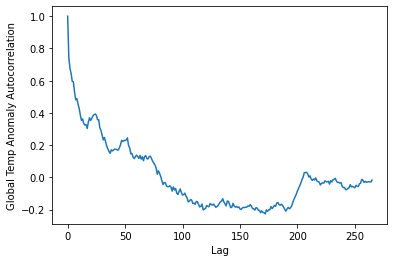

In [26]:
plt.plot(xacf,acf)
plt.xlabel("Lag")
plt.ylabel("Global Temp Anomaly Autocorrelation")

Comparing using other libraries:

In [22]:
""" Using statsmodels acf """
import statsmodels.api as sm
t1=sm.tsa.acf(mdata[:,1], nlags=len(mdata[:,1]))

Text(0, 0.5, 'Global Temp Anomaly Autocorrelation')

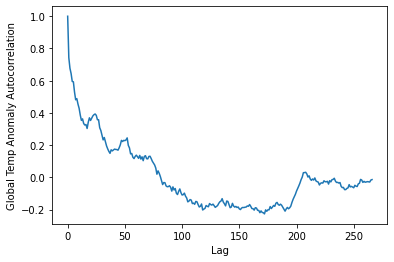

In [23]:
xt1=[i for i in range(len(t1))]
plt.plot(xt1,t1)
plt.xlabel("Lag")
plt.ylabel("Global Temp Anomaly Autocorrelation")